In [150]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.stem import PorterStemmer
from num2words import num2words

In [151]:
# processing the data
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text
def convert_lower_case(data):
    return np.char.lower(data)
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")
def stemming(data):
    stemmer= PorterStemmer()
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

In [152]:
# further cleaning of text
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    #data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    #data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    return data

In [153]:
urls = ['https://finalfantasy.fandom.com/wiki/Cecil_Harvey/Dissidia_NT', 
        'https://www.imperva.com/learn/application-security/honeypot-honeynet/',
        'https://marvelcinematicuniverse.fandom.com/wiki/Thanos/Warrior_Thanos',
        'https://www.kaspersky.com/resource-center/definitions/what-is-a-packet-sniffer',
        'https://www.recipetineats.com/honey-garlic-chicken/',
        'https://insecure.org/fyodor/',
        'https://www.cc.gatech.edu/faculty/ashwin/wisdom/what-is-a-thesis-defense.html',
        'https://www.information-age.com/what-to-know-about-user-authentication-cyber-security-123487818/',
        'https://www.cinemablend.com/new/30-Best-Horror-Movies-All-Time-122567.html',
        'https://brilliant.org/wiki/depth-first-search-dfs/'
       ]

In [154]:
# scrape and clean the html data from the url
def process_url(url):
    page = requests.get(url)
    page_data = BeautifulSoup(page.content, 'html.parser')
    clean_data = preprocess(page_data.get_text())
    
    return clean_data

In [155]:
page_txt = [str(process_url(url)).lstrip() for url in urls]
print(page_txt)

['cecil harvey dissidia nt final fantasy wiki fandom final fantasy wiki explore main page discuss pages community shop apparel jewelry home stationery novelties costumes toys games gaming vii remake characters cloud strife barret wallace tifa lockhart aerith gainsborough sephiroth locations midgar 7th heaven gameplay limit break materia latest upcoming games final fantasy xvi stranger paradise final fantasy origin games final fantasy viii final fantasy final fantasy ii final fantasy iii final fantasy iv final fantasy final fantasy vi final fantasy vii final fantasy viii final fantasy ix xvi final fantasy ix final fantasy final fantasy xi final fantasy xii final fantasy xiii final fantasy xiv final fantasy xv final fantasy xvi subseries contents characters jobs races locations gameplay items equipment abilities magic enemies bosses music walkthroughs community administrators staff directory contact us wiki business feedback discord chat staff noticeboard wiki editor portal policies guid

In [156]:
# count the tf of each word in every document
frequencies = {}
for pg_txt in page_txt:
    raw_list = pg_txt.split()
    word_list = list(dict.fromkeys(raw_list))
    for word in word_list:
        if word in frequencies:
            count = frequencies[word] + 1
        else:
            count = 1
        frequencies[word] = count

for key, value in frequencies.items():
    print(f'{key} : {value}')

cecil : 1
harvey : 1
dissidia : 1
nt : 1
final : 3
fantasy : 1
wiki : 3
fandom : 2
explore : 5
main : 4
page : 5
discuss : 2
pages : 3
community : 4
shop : 1
apparel : 1
jewelry : 1
home : 6
stationery : 1
novelties : 1
costumes : 1
toys : 1
games : 4
gaming : 1
vii : 1
remake : 2
characters : 3
cloud : 4
strife : 1
barret : 1
wallace : 1
tifa : 1
lockhart : 1
aerith : 1
gainsborough : 1
sephiroth : 1
locations : 2
midgar : 1
7th : 2
heaven : 1
gameplay : 1
limit : 3
break : 2
materia : 1
latest : 5
upcoming : 3
xvi : 1
stranger : 1
paradise : 1
origin : 1
viii : 1
ii : 3
iii : 1
iv : 1
vi : 1
ix : 1
xi : 1
xii : 1
xiii : 1
xiv : 1
xv : 1
subseries : 1
contents : 4
jobs : 3
races : 1
items : 2
equipment : 2
abilities : 2
magic : 2
enemies : 2
bosses : 1
music : 1
walkthroughs : 1
administrators : 2
staff : 1
directory : 1
contact : 8
us : 7
business : 5
feedback : 1
discord : 1
chat : 1
noticeboard : 1
editor : 1
portal : 3
policies : 3
guidelines : 2
scope : 1
recent : 5
changes : 1
l

towards : 1
repel : 1
overpower : 1
telekinetically : 1
slicing : 1
chipped : 1
rain : 1
fire : 1
pain : 1
pressure : 3
troops : 1
lives : 2
stake : 1
glaives : 1
protest : 1
yelled : 1
letting : 2
barrage : 1
laser : 1
cannons : 1
craft : 1
shoot : 1
airstrike : 1
successful : 2
keeping : 2
rest : 3
opposition : 1
bay : 1
marvels : 1
stopped : 1
interference : 1
sky : 1
warship : 1
aiming : 1
firing : 1
huge : 1
streak : 1
space : 2
effort : 4
bewildered : 1
looked : 2
shock : 1
quantum : 1
tunnel : 1
destroys : 1
vans : 1
pepper : 2
potts : 1
shuri : 1
allowing : 1
right : 5
van : 2
ditch : 1
explode : 1
ensuing : 1
explosion : 1
raced : 1
dropped : 1
intervened : 1
easily : 4
tossed : 2
aside : 2
brute : 2
fending : 1
assault : 1
grab : 1
decapitate : 1
struggle : 2
grappled : 1
held : 1
standstill : 1
joined : 1
throat : 1
headbutted : 1
punched : 1
overpowered : 1
grabbing : 1
putting : 3
restrained : 2
clear : 2
overpowering : 1
headbutt : 1
effect : 2
forced : 1
knees : 1
pull :

2nd : 1
sample : 1
chapters : 1
ok : 1
didnt : 1
starred : 1
comic : 2
hero : 1
clustermind : 1
11mb : 1
pdf : 1
kidnapped : 1
misusing : 1
hacking : 2
favorites : 2
dozen : 2
language : 2
sections : 1
cover : 1
aspect : 2
describes : 2
interrogates : 1
ports : 1
exactly : 1
locate : 1
forbidden : 1
hide : 1
unusual : 1
tcp : 1
fingerprinting : 1
generation : 2
uses : 4
guess : 2
targets : 1
idle : 1
ipid : 1
anonymous : 1
spoofed : 2
tricks : 1
enabled : 1
predictable : 2
sequence : 2
numbers : 2
generated : 1
voted : 1
archives : 1
mailing : 1
3rd : 1
daily : 1
dave : 1
rss : 2
feeds : 1
tutorials : 1
bunch : 2
doesnt : 3
fit : 1
neatly : 1
profit : 2
besides : 2
aforementioned : 2
served : 1
president : 1
responsibility : 1
cpsr : 1
promoted : 1
responsible : 2
incubated : 1
freedom : 1
cfp : 1
conference : 1
contributor : 2
volunteer : 1
supporter : 1
foundation : 1
defective : 1
campaign : 1
drm : 1
frontier : 2
laptop : 1
child : 2
museum : 1
registrar : 1
godaddy : 1
inapropriat

flesh : 1
starved : 1
cannibals : 1
storied : 1
murnau : 1
spookiest : 1
vampire : 1
studio : 1
orlock : 1
estate : 1
wife : 1
mainstay : 1
baggage : 1
max : 1
schreck : 1
plays : 1
shadowy : 1
mythology : 1
eeriest : 1
presences : 1
shivers : 1
spine : 1
defining : 1
20th : 1
expressionism : 1
contrasts : 1
artistic : 1
flourishes : 1
symbolic : 1
imagery : 1
dysfunctionally : 1
psychotic : 1
happen : 1
teens : 1
leatherface : 1
clan : 1
tobe : 1
hooper : 1
adore : 1
complaints : 1
despicable : 1
hounds : 1
evolved : 1
brutal : 1
shocking : 1
unsettling : 1
transgressive : 1
trappings : 1
celluloid : 1
crap : 1
foot : 1
tall : 1
plated : 1
razor : 1
teeth : 1
mouth : 1
acid : 1
ridley : 1
brings : 1
table : 1
endless : 1
manages : 1
claustrophobia : 1
surprise : 1
capped : 1
protagonists : 1
sigourney : 1
ellen : 1
ripley : 1
badass : 1
fragile : 1
relatable : 1
driven : 1
extreme : 1
jaws : 1
convinces : 1
ocean : 1
sports : 1
steven : 1
spielberg : 1
ushered : 1
blockbuster : 1
shar

In [157]:
import math

In [158]:
# compute for the idf of each word 
idf_count = {}
for key, value in frequencies.items():
    idf = 0
    dup = 10/value
    idf = math.log(dup)
    idf_count[key] = idf
    
for key, value in idf_count.items():
    print(f'{key} : {value}')

cecil : 2.302585092994046
harvey : 2.302585092994046
dissidia : 2.302585092994046
nt : 2.302585092994046
final : 1.2039728043259361
fantasy : 2.302585092994046
wiki : 1.2039728043259361
fandom : 1.6094379124341003
explore : 0.6931471805599453
main : 0.9162907318741551
page : 0.6931471805599453
discuss : 1.6094379124341003
pages : 1.2039728043259361
community : 0.9162907318741551
shop : 2.302585092994046
apparel : 2.302585092994046
jewelry : 2.302585092994046
home : 0.5108256237659907
stationery : 2.302585092994046
novelties : 2.302585092994046
costumes : 2.302585092994046
toys : 2.302585092994046
games : 0.9162907318741551
gaming : 2.302585092994046
vii : 2.302585092994046
remake : 1.6094379124341003
characters : 1.2039728043259361
cloud : 0.9162907318741551
strife : 2.302585092994046
barret : 2.302585092994046
wallace : 2.302585092994046
tifa : 2.302585092994046
lockhart : 2.302585092994046
aerith : 2.302585092994046
gainsborough : 2.302585092994046
sephiroth : 2.302585092994046
locat

even : 0.6931471805599453
swiftly : 2.302585092994046
assaults : 2.302585092994046
blocks : 1.6094379124341003
mans : 2.302585092994046
blasts : 2.302585092994046
blasted : 2.302585092994046
repulsors : 2.302585092994046
pushed : 1.6094379124341003
closer : 2.302585092994046
possible : 0.5108256237659907
repulsor : 2.302585092994046
throwing : 2.302585092994046
lifted : 2.302585092994046
receive : 1.2039728043259361
effectively : 1.6094379124341003
knocking : 2.302585092994046
furiously : 2.302585092994046
battling : 2.302585092994046
defeated : 2.302585092994046
kicked : 2.302585092994046
face : 1.6094379124341003
responded : 2.302585092994046
punch : 2.302585092994046
threw : 2.302585092994046
protecting : 1.6094379124341003
throw : 2.302585092994046
slide : 1.6094379124341003
dodge : 2.302585092994046
catching : 2.302585092994046
blocked : 2.302585092994046
took : 1.6094379124341003
stormbreaker : 2.302585092994046
viciously : 2.302585092994046
attempts : 1.2039728043259361
dodged :

published : 2.302585092994046
feb : 1.6094379124341003
20updated : 2.302585092994046
nov : 2.302585092994046
comments : 2.302585092994046
dozer : 2.302585092994046
epic : 1.6094379124341003
minute : 2.302585092994046
ingredient : 2.302585092994046
sauce : 2.302585092994046
terrific : 2.302585092994046
pocket : 2.302585092994046
dinner : 2.302585092994046
busy : 2.302585092994046
nights : 2.302585092994046
pantry : 2.302585092994046
staples : 2.302585092994046
amazing : 1.6094379124341003
ingredients : 2.302585092994046
transform : 2.302585092994046
tasty : 2.302585092994046
bonus : 2.302585092994046
protein : 2.302585092994046
tofu : 2.302585092994046
variation : 2.302585092994046
popular : 1.6094379124341003
readers : 2.302585092994046
ever : 0.9162907318741551
summary : 2.302585092994046
sauces : 2.302585092994046
probably : 0.9162907318741551
requires : 1.2039728043259361
simmered : 2.302585092994046
seared : 2.302585092994046
skillet : 2.302585092994046
becomes : 2.302585092994046


spirit : 2.302585092994046
william : 2.302585092994046
1960s : 2.302585092994046
screen : 2.302585092994046
bolstered : 2.302585092994046
fairly : 2.302585092994046
buzz : 2.302585092994046
sold : 2.302585092994046
missing : 2.302585092994046
documentary : 2.302585092994046
filmmakers : 2.302585092994046
genuine : 2.302585092994046
grossed : 2.302585092994046
worldwide : 2.302585092994046
budget : 2.302585092994046
weeks : 2.302585092994046
myrick : 2.302585092994046
eduardo : 2.302585092994046
sanchez : 2.302585092994046
acclaimed : 2.302585092994046
influence : 2.302585092994046
worse : 2.302585092994046
choosing : 2.302585092994046
indirect : 2.302585092994046
abstract : 2.302585092994046
viewers : 2.302585092994046
unsettled : 2.302585092994046
emotions : 2.302585092994046
stands : 2.302585092994046
corner : 2.302585092994046
panned : 2.302585092994046
invasion : 2.302585092994046
snatchers : 2.302585092994046
bad : 2.302585092994046
treatment : 2.302585092994046
monolith : 2.30258

In [159]:
# compute for tf-idf of each word (for all documents)
dict_tf_idf = {}

for key, value in frequencies.items():
    dict_tf_idf[key] = frequencies[key] * idf_count[key]
    
print(dict_tf_idf)

{'cecil': 2.302585092994046, 'harvey': 2.302585092994046, 'dissidia': 2.302585092994046, 'nt': 2.302585092994046, 'final': 3.6119184129778086, 'fantasy': 2.302585092994046, 'wiki': 3.6119184129778086, 'fandom': 3.2188758248682006, 'explore': 3.4657359027997265, 'main': 3.6651629274966204, 'page': 3.4657359027997265, 'discuss': 3.2188758248682006, 'pages': 3.6119184129778086, 'community': 3.6651629274966204, 'shop': 2.302585092994046, 'apparel': 2.302585092994046, 'jewelry': 2.302585092994046, 'home': 3.0649537425959443, 'stationery': 2.302585092994046, 'novelties': 2.302585092994046, 'costumes': 2.302585092994046, 'toys': 2.302585092994046, 'games': 3.6651629274966204, 'gaming': 2.302585092994046, 'vii': 2.302585092994046, 'remake': 3.2188758248682006, 'characters': 3.6119184129778086, 'cloud': 3.6651629274966204, 'strife': 2.302585092994046, 'barret': 2.302585092994046, 'wallace': 2.302585092994046, 'tifa': 2.302585092994046, 'lockhart': 2.302585092994046, 'aerith': 2.302585092994046,

In [160]:
# sort words and tf-idf's from most significant to least significant 
sorted_idf = {k: v for k, v in sorted(dict_tf_idf.items(), key=lambda item: item[1], reverse=True)}

#remove duplicate idf (for viewing in graph)
temp = {val : key for key, val in sorted_idf.items()}
dup_dict = {val : key for key, val in temp.items()}

print(dup_dict)

{'process': 3.6651629274966204, 'course': 3.6119184129778086, 'common': 3.4657359027997265, 'toronto': 3.2188758248682006, 'good': 3.0649537425959443, 'much': 2.4967246075711267, 'loading': 2.302585092994046, 'using': 1.7851484105136781, 'many': 0.9482446409204371, 'new': 0.0}


In [161]:
keys = list(dict.fromkeys(dup_dict))
print(keys)

['process', 'course', 'common', 'toronto', 'good', 'much', 'loading', 'using', 'many', 'new']


In [163]:
top_10_keys = keys[:10]
tf_idf_top = []
top_10_keys.reverse()
for key in top_10_keys:
    tf_idf_top.append(dup_dict[key])
print(tf_idf_top)

[0.0, 0.9482446409204371, 1.7851484105136781, 2.302585092994046, 2.4967246075711267, 3.0649537425959443, 3.2188758248682006, 3.4657359027997265, 3.6119184129778086, 3.6651629274966204]


In [147]:
import matplotlib.pyplot as plt

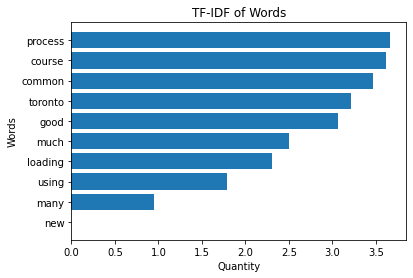

In [164]:
plt.barh(top_10_keys, tf_idf_top)
plt.title('TF-IDF of Words')
plt.ylabel('Words')
plt.xlabel('Quantity')
plt.show()